# Call Center Cleanup

For this assignment, we will be working with call center data. You can start working on the assignment after the first lesson on Exploratory Data Analysis with pandas. Make sure to read the whole assignment before starting anything! As you code along in the Jupyter notebook, you are asked to make note of the results of your analysis. Do so by clicking on the results box and adding your notes beside each question.

## Business Issue and Understanding

You are working for a company that has two call centers: the North Call Center and the South Call Center. The company is looking to possibly hire five additional reps to enhance customer experience. Your task is to explore how efficient the current reps are in each branch to determine which branch would benefit from additional assistance.

### How the Call Center Works

Call center representatives are assigned queues. When calls are assigned to a queue, the call is assigned to the next person in line in the queue. After a call is assigned to a representative, the amount of time between assignment and the call starting is divided into busy minutes and not ready minutes. If the call is incoming and a customer is waiting on the phone for a rep, the time is split into three categories: busy minutes, not ready minutes, and incoming call wait time. Once the rep has the customer on the phone, there might be during call wait time, where the call is put on hold while the rep gets an answer for the customer.

### Notes about the Dataset

If you haven't worked in a call center before, these notes might help you throughout your analysis.

* The call purpose is tagged for each call.
* The time of the call is tagged in 1 hour blocks starting at 9:00 AM and ending at 5:00 PM.
* Calls are tagged as incoming or outgoing.
* Reps are assigned to queues. When the reps are working, they take calls in the order of their queue.
* A call that is dropped due to technical error or missed by the center because they have reached maximum capacity is a lost call.
* An abandoned call is when the customer hangs up because they have been waiting for too long.
* Busy Minutes: the amount of time after a call comes in or needs to go out where the assigned rep is not available because they are busy with other customers.
* Not Ready Minutes: the amount of time after a call comes in or needs to go out where the assigned rep is not available because they are not ready (for example, getting water).
* Incoming Wait Time - amount of time after assigned rep is available to take the call customer waits for representative to pick up a call. This is tracked in seconds.
* During Call Wait Time - amount of time during call that customer has to wait for representative

## Getting Started

You have two CSVs at your disposal, `NorthCallCenter.csv` and `SouthCallCenter.csv`. Import the appropriate libraries and create two dataframes, one called `north_df` and one called `south_df`.

In [1]:
# Import the appropriate libraries with aliases

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Create two new dataframes

north_df = pd.read_csv("C:/Users/Sa Shea/data-analysis-projects-SaSheaG/call-center-cleanup-assignment/NorthCallCenter.csv")

south_df = pd.read_csv("C:/Users/Sa Shea/data-analysis-projects-SaSheaG/call-center-cleanup-assignment/SouthCallCenter.csv")

## Task 1: Exploratory Data Analysis

Time to do some EDA! In the process of learning more about the two datasets, answer the following questions. Use the code blocks below to begin cleaning your data. At the end of the section, record your answers.

#### EDA Question 1A:  How many reps are in the North branch?  

In [ ]:
# EDA Question 1A solution below:

north_df["Rep ID"].value_counts()

# 9 reps

Rep ID
Brent     37
Lilly     30
Todd      29
Duke      29
Joe       26
Cam       24
Xander    24
Amanda    23
Andy      23
Name: count, dtype: int64

In [15]:
north_df.head()

,Unnamed: 0,Branch,Call Purpose,Time Block,Incoming or Outgoing,Queue,Rep ID,Sale,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
0,0,North,Complaint,9:00 AM,Incoming,B,Brent,NO,0,1,9,2,1.0,4,1
1,1,North,Sales Support,11:00 AM,Incoming,A,Cam,NO,0,0,11,1,1.0,3,1
2,2,North,Sales Support,11:00 AM,Incoming,B,Todd,NO,0,0,9,3,1.0,3,1
3,3,North,Sales Support,4:00 PM,Incoming,B,Brent,NO,0,0,11,2,1.0,4,1
4,4,North,Product Support,12:00 PM,Incoming,B,Brent,NO,0,0,8,2,1.0,4,1


#### EDA Question 1B:  How many reps are in the South branch?  

In [ ]:
# EDA Question 1B solution Below:

south_df["Rep ID"].value_counts()

# 11 reps

Rep ID
Eric      35
Randy     33
Sandy     32
Helga     31
Kate      29
George    29
Karl      28
Susan     26
Josh      26
Sharon    25
Alice     20
Name: count, dtype: int64

In [16]:
south_df.head()

,Unnamed: 0,Branch,Call Purpose,Time Block,Incoming or Outgoing,Queue,Rep ID,Sale,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
0,0,South,Sales Support,10:00 AM,Incoming,D,Kate,NO,0,0,9,1,1.0,2,1
1,1,South,Sales Support,10:00 AM,Incoming,C,Eric,NO,0,0,8,2,1.0,4,1
2,2,South,Sales Support,10:00 AM,Incoming,C,Susan,NO,0,0,10,2,1.0,4,1
3,3,South,Sales Support,10:00 AM,Incoming,C,Alice,NO,0,0,12,1,1.0,3,1
4,4,South,Sales Support,12:00 PM,Incoming,C,Sandy,NO,0,0,8,3,1.0,3,1


#### EDA Question 2A:  What is the average busy minutes, not ready minutes, incoming wait time, and during call wait time for the North branch? 

In [31]:
# EDA Question 2A solution Below:

avg_busy_minutes_north = round(np.mean(north_df["Busy Minutes"]), 2)
print(f"Average Busy Minutes for North Branch: {avg_busy_minutes_north}")

avg_not_ready_minutes_north = round(np.mean(north_df["Not Ready Minutes"]), 2)
print(f"Average Not Ready Minutes for North Branch: {avg_not_ready_minutes_north}")

avg_incoming_wait_time_north = round(np.mean(north_df["Incoming Wait Time"]), 2)
print(f"Average Incoming Wait Time for North Branch: {avg_incoming_wait_time_north}")

avg_during_wait_time_north = round(np.mean(north_df["During Call Wait Time"]), 2)
print(f"Average During Wait Time for North Branch: {avg_during_wait_time_north}")


Average Busy Minutes for North Branch: 9.99
Average Not Ready Minutes for North Branch: 1.91
Average Incoming Wait Time for North Branch: 3.05
Average During Wait Time for North Branch: 2.97


#### EDA Question 2B:  What is the average busy minutes, not ready minutes, incoming wait time, and during call wait time for the South branch? 

In [33]:
# EDA Question 2B solution Below:

avg_busy_minutes_south = round(np.mean(south_df["Busy Minutes"]), 2)
print(f"Average Busy Minutes for South Branch: {avg_busy_minutes_south}")

avg_not_ready_minutes_south = round(np.mean(south_df["Not Ready Minutes"]), 2)
print(f"Average Not Ready Minutes for South Branch: {avg_not_ready_minutes_south}")

avg_incoming_wait_time_south = round(np.mean(south_df["Incoming Wait Time"]), 2)
print(f"Average Incoming Wait Time for South Branch: {avg_incoming_wait_time_south}")

avg_during_wait_time_south = round(np.mean(south_df["During Call Wait Time"]), 2)
print(f"Average During Call Wait Time for South Branch: {avg_during_wait_time_south}")

Average Busy Minutes for South Branch: 10.05
Average Not Ready Minutes for South Branch: 1.91
Average Incoming Wait Time for South Branch: 3.0
Average During Call Wait Time for South Branch: 3.08


#### EDA Question 3:  What is the number of calls taken for each time block(Both North and South combined)?

In [28]:
# EDA Question 3 solution Below:

north_time_block_totals = north_df["Time Block"].value_counts()
print(north_time_block_totals)


Time Block
12:00 PM    45
10:00 AM    43
2:00 PM     35
3:00 PM     30
4:00 PM     28
11:00 AM    25
1:00 PM     17
5:00 PM     17
9:00 AM      5
Name: count, dtype: int64


In [29]:
south_time_block_totals = south_df["Time Block"].value_counts()
print(south_time_block_totals)

Time Block
12:00 PM    75
10:00 AM    56
3:00 PM     43
11:00 AM    31
2:00 PM     30
5:00 PM     26
4:00 PM     25
1:00 PM     23
9:00 AM      5
Name: count, dtype: int64


In [30]:
north_and_south_time_block_comibined = north_time_block_totals.add(south_time_block_totals, fill_value=0)
print(north_and_south_time_block_comibined)

Time Block
10:00 AM     99
11:00 AM     56
12:00 PM    120
1:00 PM      40
2:00 PM      65
3:00 PM      73
4:00 PM      53
5:00 PM      43
9:00 AM      10
Name: count, dtype: int64


##### Record your answers for the EDA section below:
- 1a) Reps in the North Branch = 9
- 1b) Reps in the South Branch = 11


- 2a) North Branch, (round to the nearest hundredth):
> - Busy Minutes = 9.99
> - Not Ready Minutes = 1.91
> - Incoming Wait Time = 3.05
> - During Call Wait Time = 2.97
- 2b) South Branch, (round to the nearest hundredth):
> - Busy Minutes = 10.05
> - Not Ready Minutes = 1.91
> - Incoming Wait Time = 3.00
> - During Call Wait Time = 3.08
- 3) Total Calls taken for all branches per time block:
> - 9:00AM   = 10
> - 10:00AM  = 99
> - 11:00AM  = 56
> - 12:00PM  = 120
> - 1:00PM   = 40
> - 2:00PM   = 65
> - 3:00PM   = 73
> - 4:00PM   = 53
> - 5:00PM   = 43



## Task 2: Cleaning Your Data 
Now you need to clean up the datasets. When cleaning the datasets, you may find that there isn't dirty data to clean. That is okay! Some questions you need to answer about the data sets.
* Add additional code blocks as needed to show how you came to your conclusions. Add comments in your code blocks to help others understand your thinking. 

#### Cleaning Question 1:  Is there any missing data and if yes explain what you would do with the missing data and why?

In [ ]:
# Question 1 solution below

# I am checking to see which columns contain null values in the North Branch dataframe. 

north_df.isna().sum()

Unnamed: 0                 0
Branch                     0
Call Purpose               0
Time Block                 0
Incoming or Outgoing       0
Queue                      0
Rep ID                     0
Sale                       0
Lost Call                  0
Abandoned                  0
Busy Minutes               0
Not Ready Minutes          0
Incoming Wait Time       163
During Call Wait Time      0
Calls                      0
dtype: int64

In [ ]:
# I am checking to see which columns contain null values in the South Branch dataframe. 

south_df.isna().sum()

Unnamed: 0                 0
Branch                     0
Call Purpose               0
Time Block                 0
Incoming or Outgoing       0
Queue                      0
Rep ID                     0
Sale                       0
Lost Call                  0
Abandoned                  0
Busy Minutes               0
Not Ready Minutes          0
Incoming Wait Time       188
During Call Wait Time      0
Calls                      0
dtype: int64

In [ ]:
# I am checking to see which columns contain null values in the South Branch dataframe. 

north_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 245 entries, 0 to 244
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             245 non-null    int64  
 1   Branch                 245 non-null    object 
 2   Call Purpose           245 non-null    object 
 3   Time Block             245 non-null    object 
 4   Incoming or Outgoing   245 non-null    object 
 5   Queue                  245 non-null    object 
 6   Rep ID                 245 non-null    object 
 7   Sale                   245 non-null    object 
 8   Lost Call              245 non-null    int64  
 9   Abandoned              245 non-null    int64  
 10  Busy Minutes           245 non-null    int64  
 11  Not Ready Minutes      245 non-null    int64  
 12  Incoming Wait Time     82 non-null     float64
 13  During Call Wait Time  245 non-null    int64  
 14  Calls                  245 non-null    int64  
dtypes: flo

In [ ]:
# I am calculating the percentage of data missing per column in the North Branch dataframe.

for col in north_df.columns:
    pct_missing = np.mean(north_df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

Unnamed: 0 - 0%
Branch - 0%
Call Purpose - 0%
Time Block - 0%
Incoming or Outgoing - 0%
Queue - 0%
Rep ID - 0%
Sale - 0%
Lost Call - 0%
Abandoned - 0%
Busy Minutes - 0%
Not Ready Minutes - 0%
Incoming Wait Time - 67%
During Call Wait Time - 0%
Calls - 0%


In [46]:
# I am calculating the percentage of data missing per column in the South Branch dataframe.

for col in south_df.columns:
    pct_missing = np.mean(south_df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

Unnamed: 0 - 0%
Branch - 0%
Call Purpose - 0%
Time Block - 0%
Incoming or Outgoing - 0%
Queue - 0%
Rep ID - 0%
Sale - 0%
Lost Call - 0%
Abandoned - 0%
Busy Minutes - 0%
Not Ready Minutes - 0%
Incoming Wait Time - 60%
During Call Wait Time - 0%
Calls - 0%


In [ ]:
# I am checking to see if the null values in the Incoming Wait Time column correspond with any incoming calls or if they only correspond with outgoing calls.
# Incoming Wait Time would not apply to any outgoing calls, so it is possible that the Incoming Wait Time column was populated with null for all the outgoing calls.

call_type_incoming_wait_north = north_df[["Incoming or Outgoing", "Incoming Wait Time"]].isnull().groupby(north_df["Incoming or Outgoing"]).sum()
call_type_incoming_wait_north

,Incoming or Outgoing,Incoming Wait Time
Incoming or Outgoing,,
Incoming,0,0
Outgoing,0,163


In [ ]:
# I am checking to see if the null values in the Incoming Wait Time column correspond with any incoming calls or if they only correspond with outgoing calls.
# Incoming Wait Time would not apply to any outgoing calls, so it is possible that the Incoming Wait Time column was populated with null for all the outgoing calls.

call_type_incoming_wait_south = south_df[["Incoming or Outgoing", "Incoming Wait Time"]].isnull().groupby(south_df["Incoming or Outgoing"]).sum()
call_type_incoming_wait_south

,Incoming or Outgoing,Incoming Wait Time
Incoming or Outgoing,,
Incoming,0,0
Outgoing,0,188


#### Record your answer below:

> Your Answer: There is only missing data in the Incoming Wait Time columns in both dataframes. Upon completing further analysis, I realized that the null values only occured for outgoing calls. Incoming Wait Time does not apply to outgoing calls at all. Therefore, I would leave the values as null.

#### Cleaning Question 2:  In the North data set, there are two separate "YES" values for a sale. Why and how did you rectify the issue?

In [49]:
# Cleaning Question 2 solution below:

north_df["Sale"].value_counts()

Sale
NO      234
YES      10
YES       1
Name: count, dtype: int64

In [2]:
# I thought that one of the YES options had trailing space which caused there to be two YES options. 
# The code below allowed me to see that the other YES does have trailing space, and it occurs in row 19.

with_trailing_space = north_df["Sale"].str.endswith(" ")
rows_with_trailing_space = north_df[with_trailing_space]

print(rows_with_trailing_space)

    Unnamed: 0 Branch   Call Purpose Time Block Incoming or Outgoing Queue  \
19          19  North  Sales Support   10:00 AM             Incoming     B   

   Rep ID  Sale  Lost Call  Abandoned  Busy Minutes  Not Ready Minutes  \
19  Lilly  YES           0          0            11                  2   

    Incoming Wait Time  During Call Wait Time  Calls  
19                 2.0                      4      1  


In [2]:
# I am removing the trailing space from the Sale column in the North Branch dataframe. 

north_df["Sale"] = north_df["Sale"].str.rstrip()

In [ ]:
# I am running another value_counts() to see if there is now only one YES option. I see that there is now only one YES option and the total
# for YES is now 11.

north_df["Sale"].value_counts()

Sale
NO     234
YES     11
Name: count, dtype: int64

##### Record your answer by below:
> Your Answer: There were two YES values because one of YES values in the Sale column had trailing space. I stripped the trailing space from the Sale column, and now there is only one YES option with the combined total of the two previous YES values. 

#### Cleaning Question 3:  Are there duplicates in the two data sets? If there are, how did you handle them?

In [ ]:
# Cleaning Question 3 solution below:

# I am checking to see if there are any duplicates in the North Branch dataframe. 

north_df.duplicated().sum()

np.int64(0)

In [ ]:
# I am checking to see if there are any duplicates in the South Branch dataframe. 

south_df.duplicated().sum()

np.int64(0)

##### Record your answer below:
> Your Answer: I did not find any duplicates in either dataframe.

#### Cleaning Question 4:  Is any of the data in the two data sets unnecessary? If yes, how did you handle it?

In [30]:
# Cleaning Question 4 solution below:

north_df.head(10)

,Unnamed: 0,Branch,Call Purpose,Time Block,Incoming or Outgoing,Queue,Rep ID,Sale,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
0,0,North,Complaint,9:00 AM,Incoming,B,Brent,NO,0,1,9,2,1.0,4,1
1,1,North,Sales Support,11:00 AM,Incoming,A,Cam,NO,0,0,11,1,1.0,3,1
2,2,North,Sales Support,11:00 AM,Incoming,B,Todd,NO,0,0,9,3,1.0,3,1
3,3,North,Sales Support,4:00 PM,Incoming,B,Brent,NO,0,0,11,2,1.0,4,1
4,4,North,Product Support,12:00 PM,Incoming,B,Brent,NO,0,0,8,2,1.0,4,1
5,5,North,Product Support,2:00 PM,Incoming,B,Duke,NO,0,0,12,2,1.0,2,1
6,6,North,Product Support,2:00 PM,Incoming,A,Joe,NO,0,0,8,1,1.0,3,1
7,7,North,Product Support,2:00 PM,Incoming,B,Lilly,NO,0,0,11,2,1.0,3,1
8,8,North,Product Support,3:00 PM,Incoming,B,Duke,NO,0,0,12,2,1.0,4,1
9,9,North,Product Support,3:00 PM,Incoming,A,Cam,NO,0,0,11,3,1.0,4,1


In [8]:
south_df.head(10)

,Unnamed: 0,Branch,Call Purpose,Time Block,Incoming or Outgoing,Queue,Rep ID,Sale,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
0,0,South,Sales Support,10:00 AM,Incoming,D,Kate,NO,0,0,9,1,1.0,2,1
1,1,South,Sales Support,10:00 AM,Incoming,C,Eric,NO,0,0,8,2,1.0,4,1
2,2,South,Sales Support,10:00 AM,Incoming,C,Susan,NO,0,0,10,2,1.0,4,1
3,3,South,Sales Support,10:00 AM,Incoming,C,Alice,NO,0,0,12,1,1.0,3,1
4,4,South,Sales Support,12:00 PM,Incoming,C,Sandy,NO,0,0,8,3,1.0,3,1
5,5,South,Sales Support,1:00 PM,Incoming,D,Karl,NO,0,0,9,1,1.0,4,1
6,6,South,Product Support,11:00 AM,Incoming,C,Sandy,NO,0,0,8,1,1.0,2,1
7,7,South,Product Support,12:00 PM,Incoming,C,Sandy,NO,0,0,8,1,1.0,3,1
8,8,South,Product Support,2:00 PM,Incoming,D,Randy,NO,0,0,11,2,1.0,4,1
9,9,South,Product Support,3:00 PM,Incoming,D,George,NO,0,0,8,3,1.0,4,1


In [9]:
north_df["Calls"].value_counts()

Calls
1    245
Name: count, dtype: int64

In [10]:
south_df["Calls"].value_counts()

Calls
1    314
Name: count, dtype: int64

In [3]:
north_df_unnamed_dropped = north_df.drop(columns=["Unnamed: 0"])
north_df_unnamed_dropped

,Branch,Call Purpose,Time Block,Incoming or Outgoing,Queue,Rep ID,Sale,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
0,North,Complaint,9:00 AM,Incoming,B,Brent,NO,0,1,9,2,1.0,4,1
1,North,Sales Support,11:00 AM,Incoming,A,Cam,NO,0,0,11,1,1.0,3,1
2,North,Sales Support,11:00 AM,Incoming,B,Todd,NO,0,0,9,3,1.0,3,1
3,North,Sales Support,4:00 PM,Incoming,B,Brent,NO,0,0,11,2,1.0,4,1
4,North,Product Support,12:00 PM,Incoming,B,Brent,NO,0,0,8,2,1.0,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
240,North,Product Support,5:00 PM,Outgoing,B,Brent,NO,0,0,10,2,NaN,3,1
241,North,Product Support,5:00 PM,Outgoing,A,Joe,NO,0,0,8,3,NaN,2,1
242,North,Product Support,5:00 PM,Outgoing,A,Amanda,NO,0,0,12,1,NaN,2,1
243,North,Product Support,5:00 PM,Outgoing,A,Cam,NO,0,0,11,2,NaN,2,1


In [4]:
south_df_unnamed_dropped = south_df.drop(columns=["Unnamed: 0"])
south_df_unnamed_dropped

,Branch,Call Purpose,Time Block,Incoming or Outgoing,Queue,Rep ID,Sale,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
0,South,Sales Support,10:00 AM,Incoming,D,Kate,NO,0,0,9,1,1.0,2,1
1,South,Sales Support,10:00 AM,Incoming,C,Eric,NO,0,0,8,2,1.0,4,1
2,South,Sales Support,10:00 AM,Incoming,C,Susan,NO,0,0,10,2,1.0,4,1
3,South,Sales Support,10:00 AM,Incoming,C,Alice,NO,0,0,12,1,1.0,3,1
4,South,Sales Support,12:00 PM,Incoming,C,Sandy,NO,0,0,8,3,1.0,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
309,South,Product Support,5:00 PM,Outgoing,D,Helga,NO,0,0,10,3,NaN,4,1
310,South,Product Support,5:00 PM,Outgoing,C,Susan,NO,0,0,12,3,NaN,4,1
311,South,Product Support,5:00 PM,Outgoing,C,Sandy,NO,0,0,9,3,NaN,4,1
312,South,Product Support,5:00 PM,Outgoing,C,Eric,NO,0,0,10,1,NaN,2,1


##### Record your answer below:
> Your Answer: The Unnamed: 0 column in both dataframes was unnecessary because there was already an index column that numbered each row. I used the drop function and passed the column name to columns= in order to drop the Unnamed: 0 column from both dataframes. 

## Task 3: Data Manipulation
Before you begin answering any questions, combine the two datasets together to create a third dataframe called df. You can use this third dataframe to compare the two call centers to company-wide trends.
* Add additional code blocks as needed to show how you came to your conclusions. Add comments in your code blocks to help others understand your thinking. Record your answer below.

In [26]:
# Create dataframe for the entire company named df

# I am using pd.concat() to combine the dataframes since both dataframes have the exact same columns
# but for different branches. I used ignore_index=True so that the index resets when it combines instead
# of keeping duplicate indexes from the original dataframes. 

df = pd.concat([north_df_unnamed_dropped, south_df_unnamed_dropped], ignore_index=True)

In [6]:
print(df)

    Branch     Call Purpose Time Block Incoming or Outgoing Queue  Rep ID  \
0    North        Complaint    9:00 AM             Incoming     B   Brent   
1    North    Sales Support   11:00 AM             Incoming     A     Cam   
2    North    Sales Support   11:00 AM             Incoming     B    Todd   
3    North    Sales Support    4:00 PM             Incoming     B   Brent   
4    North  Product Support   12:00 PM             Incoming     B   Brent   
..     ...              ...        ...                  ...   ...     ...   
554  South  Product Support    5:00 PM             Outgoing     D   Helga   
555  South  Product Support    5:00 PM             Outgoing     C   Susan   
556  South  Product Support    5:00 PM             Outgoing     C   Sandy   
557  South  Product Support    5:00 PM             Outgoing     C    Eric   
558  South  Product Support    5:00 PM             Outgoing     D  George   

    Sale  Lost Call  Abandoned  Busy Minutes  Not Ready Minutes  \
0     NO

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 559 entries, 0 to 558
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Branch                 559 non-null    object 
 1   Call Purpose           559 non-null    object 
 2   Time Block             559 non-null    object 
 3   Incoming or Outgoing   559 non-null    object 
 4   Queue                  559 non-null    object 
 5   Rep ID                 559 non-null    object 
 6   Sale                   559 non-null    object 
 7   Lost Call              559 non-null    int64  
 8   Abandoned              559 non-null    int64  
 9   Busy Minutes           559 non-null    int64  
 10  Not Ready Minutes      559 non-null    int64  
 11  Incoming Wait Time     208 non-null    float64
 12  During Call Wait Time  559 non-null    int64  
 13  Calls                  559 non-null    int64  
dtypes: float64(1), int64(6), object(7)
memory usage: 61.3+ KB


In [37]:
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

Branch - 0%
Call Purpose - 0%
Time Block - 0%
Incoming or Outgoing - 0%
Queue - 0%
Rep ID - 0%
Sale - 0%
Lost Call - 0%
Abandoned - 0%
Busy Minutes - 0%
Not Ready Minutes - 0%
Incoming Wait Time - 63%
During Call Wait Time - 0%
Calls - 0%


#### Manipulation Question 1:  Group by Rep ID and sum the resulting structure. Sort by calls to determine which rep in each branch has the highest number of calls.

In [8]:
# Manipulation Question solution below:

grouped_by_rep_id = df.groupby(["Branch", "Rep ID"])["Calls"].sum().reset_index().sort_values(["Branch", "Calls"], ascending=[True, False])

In [9]:
print(grouped_by_rep_id)

   Branch  Rep ID  Calls
2   North   Brent     37
6   North   Lilly     30
4   North    Duke     29
7   North    Todd     29
5   North     Joe     26
3   North     Cam     24
8   North  Xander     24
0   North  Amanda     23
1   North    Andy     23
10  South    Eric     35
16  South   Randy     33
17  South   Sandy     32
12  South   Helga     31
11  South  George     29
15  South    Kate     29
14  South    Karl     28
13  South    Josh     26
19  South   Susan     26
18  South  Sharon     25
9   South   Alice     20


##### Record your answer below
Rep with the hightest number of calls and their total calls:
- North Branch = Brent with 37 calls
- South Branch = Eric with 35 calls

#### Manipulation Question 2:  The average call abandonment rate is a KPI when it comes to determining call center efficiency. As you may recall, abandoned calls are calls where the customer hangs up due to long call times. What is the average call abandonment rate for each branch and the whole company? Do any of these fall out of the optimal range of 2-5%?

In [ ]:
# Manipulation Question 2 solution below:
abandonment_by_branch = df.groupby("Branch").agg(average_abandonment_rate= ("Abandoned", lambda x: round(x.mean() * 100, 2)))
abandonment_by_branch


,average_abandonment_rate
Branch,
North,2.86
South,1.27


In [10]:
abandonment_whole_company = round(df["Abandoned"].mean() * 100, 2)
abandonment_whole_company

# 1.97%

np.float64(1.97)

##### Record your answer below:
Average Call Abandonment Rates (round to the nearest hundredth):
- North Branch = 2.86%
- South Branch = 1.27%
- Company Wide = 1.97%
- Do any of these fall out of the optimal range of 2-5%? Yes, the South Branch has a 1.27% abandonment rate, and the company has a 1.97% abandonment rate. However, this is good because these percentages are less than the optimal range.

#### Manipulation Question 3:  Service level is another KPI when it comes to measuring call center efficiency. Service level is the percentage of calls answered within a specific number of seconds. In the case of your employer, their ideal time frame is 2 seconds. What is the percentage of calls answered within 2 seconds for each branch and the entire company?

In [ ]:
# Manipulation Question 3 solution below:

# I have to use .count() for calls_within_2 because it comes after the string value "Incoming or Outgoing". Sum does not work for 
# strings; it just concatenates them, which is not what we want here.

calls_within_2 = (df[(df["Incoming or Outgoing"] == "Incoming") & (df["Incoming Wait Time"] <= 2)].groupby("Branch")["Incoming or Outgoing"].count())
print(calls_within_2)

incoming_per_branch = (df[df["Incoming or Outgoing"] == "Incoming"].groupby("Branch")["Incoming or Outgoing"].count())

service_level_percent = (calls_within_2 / incoming_per_branch * 100).round(2)

service_level_percent

Branch
North    33
South    48
Name: Incoming or Outgoing, dtype: int64


Branch
North    40.24
South    38.10
Name: Incoming or Outgoing, dtype: float64

In [28]:
# for company-wide 
calls_within_2_company = (df["Incoming Wait Time"] <= 2.0).sum()
print(calls_within_2_company)
total_incoming_calls_company = (df["Incoming or Outgoing"] == "Incoming").sum()

service_level_company = (calls_within_2_company/total_incoming_calls_company *100).round(2)
service_level_company

81


np.float64(38.94)

##### Record your answer below:
Percentage of calls answered within 2 seconds, include # of calls:
- North Branch = 40.24%, 33 calls
- South Branch = 38.10%, 48 calls
- Company Wide = 38.94%, 81 calls

#### Manipulation Question 4: For each branch and the entire company, what is the average speed of answer?

In [44]:
# Manipulation Question 4 solution below:

# Answers for each branch. 
# .sum() can be used here because the values of "Incoming Wait Time" are numbers that can be summed, and we need the sum to calculate 
# the average. We need to use .count() for the denominator in our average calculation. 

total_incoming_wait_time_by_branch = df[df["Incoming or Outgoing"] == "Incoming"].groupby("Branch")["Incoming Wait Time"].sum()

number_of_incoming_calls_by_branch = df[df["Incoming or Outgoing"] == "Incoming"].groupby("Branch")["Incoming Wait Time"].count()

round((total_incoming_wait_time_by_branch / number_of_incoming_calls_by_branch), 2)



Branch
North    3.05
South    3.00
Name: Incoming Wait Time, dtype: float64

In [45]:
# Average Speed of Answer for entire company

# I used .sum() for the total_incoming_calls_company because the expression before it evaluates to 
# a Boolean value. If it is True, it represents 1, and that can be added to give the count for the 
# denominator in the average calculation. 

total_incoming_wait_time_company = (df["Incoming Wait Time"]).sum()
total_incoming_calls_company = (df["Incoming or Outgoing"] == "Incoming").sum()

avg_speed_of_answer = round((total_incoming_wait_time_company / total_incoming_calls_company), 2)
avg_speed_of_answer

np.float64(3.02)

##### Record your answer by below:
Average speed of answer (rounded to nearest hundredth):
- North Branch in seconds = 3.05
- South Branch in seconds = 3.00
- Company Wide in seconds = 3.02

## Task 4: Visualization

Create a visualization for each of the following questions. Some of the code to handle aggregating and storing data may be written for you. For each visualization, you choose the chart style that you feel suits the situation best. Make note of the chart style you chose and why. 

*NOTE Some questions you may decide to use more than one chart and or chart style.

#### Visualization 1:  What is the average abandonment rate per queue?

C:\Users\Sa Shea\AppData\Local\Temp\ipykernel_16380\992074.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  abandonment_rates[queues[i]] = (queue_dict["Abandoned"][i] / queue_dict["Calls"][i] * 100)


Text(0, 0.5, 'Average Abandonment Rate')

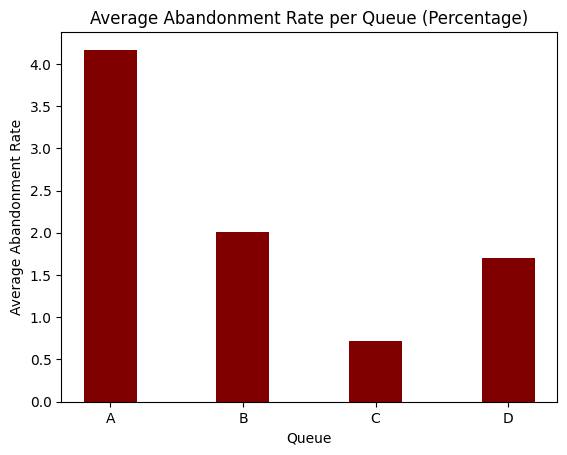

In [ ]:
# Create visualization 1 here
# Import any additional libraries needed with alias

import matplotlib.pyplot as plt


abandonment_rates = {}
queues = ["A", "B", "C", "D"]
queue_dict = df.groupby("Queue").agg("sum")
for i in range(4):
    abandonment_rates[queues[i]] = (queue_dict["Abandoned"][i] / queue_dict["Calls"][i] * 100)


#Your code below:
plt.bar(x=queues, height=list(abandonment_rates.values()),width=.4, color ='maroon')

plt.title("Average Abandonment Rate per Queue (Percentage)")
plt.xlabel("Queue")
plt.ylabel("Average Abandonment Rate")

In [8]:
print(abandonment_rates)

{'A': np.float64(0.041666666666666664), 'B': np.float64(0.020134228187919462), 'C': np.float64(0.007246376811594203), 'D': np.float64(0.017045454545454544)}


##### Record your answer below:

> Chart style you chose and why: I decided to use a vertical bar chart because we want to compare the average abandoment rates for each queue. There are only four queues to compare, so the data will be easily visible and understandable in this style of chart. 

#### Visualization 2: What is the service level percentage and average speed of answer for each rep in the North Branch?

In [ ]:
# Create visualization 2 here
# north_plt contains the data you need for the average speed of answer of each rep

north_plt = north_df_unnamed_dropped.groupby("Rep ID")["Incoming Wait Time"].mean().to_frame().reset_index()

# I have to find each rep's personal service level percentage which is their alls within 2 seconds divided by 
# their total incoming calls

# Table 1: Total incoming calls less than 2 seconds grouped by rep
quick_calls = north_df_unnamed_dropped[north_df_unnamed_dropped["Incoming Wait Time"] <= 2.0]
quick_reps = quick_calls[["Rep ID", "Calls"]]
quick_stats = quick_reps.groupby(["Rep ID"]).sum()  


# Table 2: Total incoming calls grouped by rep
total_calls_in = north_df_unnamed_dropped[north_df_unnamed_dropped["Incoming or Outgoing"] == "Incoming"]
rep_calls = total_calls_in[["Rep ID", "Calls"]]     
total_stats = rep_calls.groupby(["Rep ID"]).sum() 

#  Table 3: Service Level Percentage created via merge
service_level = pd.merge(quick_stats, total_stats, on="Rep ID")

# Create Percentage Column in Table 3
service_level["Service Level %"] = service_level["Calls_x"]/service_level["Calls_y"] * 100

#Your Code Here:


In [7]:
# I am seeing what data comes back in north_plt. 

north_plt.head()

,Rep ID,Incoming Wait Time
0,Amanda,2.400000
1,Andy,3.600000
2,Brent,2.125000
3,Cam,2.909091
4,Duke,2.785714


In [16]:
# I am seeing what data comes back in service_level.

service_level

,Calls_x,Calls_y,Service Level %
Rep ID,,,
Amanda,3,5,60.000000
Andy,3,10,30.000000
Brent,6,8,75.000000
Cam,5,11,45.454545
Duke,6,14,42.857143
Joe,2,10,20.000000
Lilly,4,12,33.333333
Todd,2,6,33.333333
Xander,2,6,33.333333


In [ ]:
# Dual axis chart 

north_plt = north_df_unnamed_dropped.groupby("Rep ID")["Incoming Wait Time"].mean().to_frame().reset_index()

# I have to find each rep's personal service level percentage which is their alls within 2 seconds divided by 
# their total incoming calls

# Table 1: Total incoming calls less than 2 seconds grouped by rep
quick_calls = north_df_unnamed_dropped[north_df_unnamed_dropped["Incoming Wait Time"] <= 2.0]
quick_reps = quick_calls[["Rep ID", "Calls"]]
quick_stats = quick_reps.groupby(["Rep ID"]).sum()  


# Table 2: Total incoming calls grouped by rep
total_calls_in = north_df_unnamed_dropped[north_df_unnamed_dropped["Incoming or Outgoing"] == "Incoming"]
rep_calls = total_calls_in[["Rep ID", "Calls"]]     
total_stats = rep_calls.groupby(["Rep ID"]).sum() 

#  Table 3: Service Level Percentage created via merge
service_level = pd.merge(quick_stats, total_stats, on="Rep ID")

# Create Percentage Column in Table 3
service_level["Service Level %"] = service_level["Calls_x"]/service_level["Calls_y"] * 100

# Create combined dataframe
combined = pd.merge(
    north_plt, 
    service_level,
    on = "Rep ID"
)




In [ ]:
# I am seeing what the combined dataframe looks like.

combined

,Rep ID,Incoming Wait Time,Calls_x,Calls_y,Service Level %
0,Amanda,2.400000,3,5,60.000000
1,Andy,3.600000,3,10,30.000000
2,Brent,2.125000,6,8,75.000000
3,Cam,2.909091,5,11,45.454545
4,Duke,2.785714,6,14,42.857143
5,Joe,3.600000,2,10,20.000000
6,Lilly,3.083333,4,12,33.333333
7,Todd,3.500000,2,6,33.333333
8,Xander,3.333333,2,6,33.333333


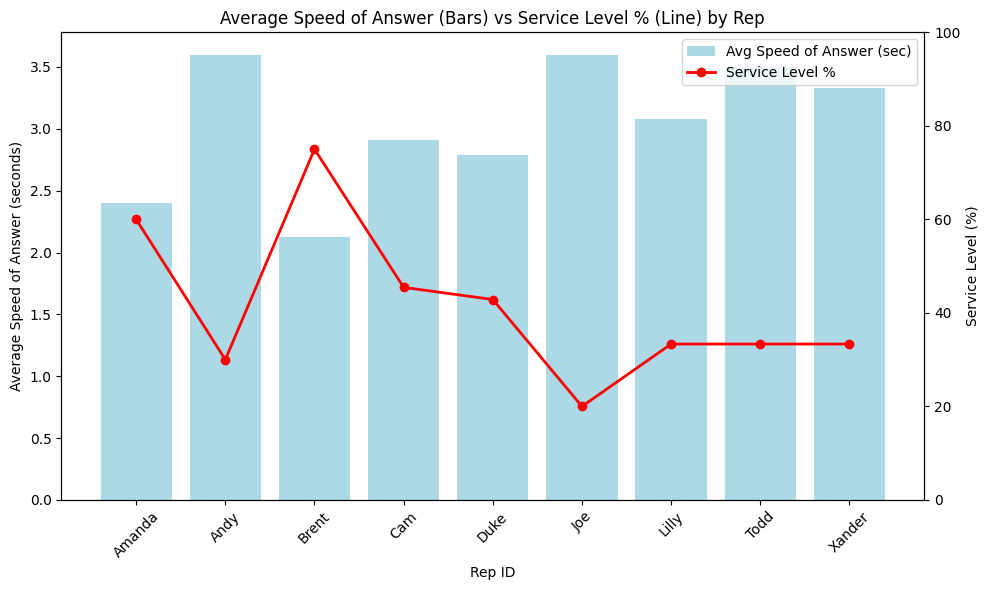

In [ ]:
# Making a dual-axis chart with bars and lines to represent the two values after combining 
# north_plt and service_level

reps = combined["Rep ID"]
asa = combined["Incoming Wait Time"]
sl = combined["Service Level %"]

x = np.arange(len(reps))

fig, ax1 = plt.subplots(figsize = (10, 6))

# Bar chart on left axis for average speed of answer
bars = ax1.bar(x, asa, color = "lightblue", label = "Avg Speed of Answer (sec)")
ax1.set_ylabel("Average Speed of Answer (seconds)")
ax1.set_xlabel("Rep ID")

# x-axis labels
plt.xticks(x, reps, rotation=45)

# Line chart on right axis for service level %
ax2 = ax1.twinx()
line = ax2.plot(x, sl, marker = "o", color = "red", linewidth = 2, label = "Service Level %")
ax2.set_ylabel("Service Level (%)")
ax2.set_ylim(0, 100)   

plt.title("Average Speed of Answer (Bars) vs Service Level % (Line) by Rep")

# Creating a legend
bar_handle = bars[0]          
line_handle = line[0]         

plt.legend([bar_handle, line_handle],
           ["Avg Speed of Answer (sec)", "Service Level %"],
           loc="upper right")


plt.tight_layout()
plt.show()



In [ ]:
# I am pasting the starter code again below to try to create a grouped bar chart. 

In [23]:
# Create visualization 2 here
# north_plt contains the data you need for the average speed of answer of each rep

north_plt = north_df_unnamed_dropped.groupby("Rep ID")["Incoming Wait Time"].mean().to_frame().reset_index()

# I have to find each rep's personal service level percentage which is their alls within 2 seconds divided by 
# their total incoming calls

# Table 1: Total incoming calls less than 2 seconds grouped by rep
quick_calls = north_df_unnamed_dropped[north_df_unnamed_dropped["Incoming Wait Time"] <= 2.0]
quick_reps = quick_calls[["Rep ID", "Calls"]]
quick_stats = quick_reps.groupby(["Rep ID"]).sum()  


# Table 2: Total incoming calls grouped by rep
total_calls_in = north_df_unnamed_dropped[north_df_unnamed_dropped["Incoming or Outgoing"] == "Incoming"]
rep_calls = total_calls_in[["Rep ID", "Calls"]]     
total_stats = rep_calls.groupby(["Rep ID"]).sum() 

#  Table 3: Service Level Percentage created via merge
service_level = pd.merge(quick_stats, total_stats, on="Rep ID")

# Create Percentage Column in Table 3
service_level["Service Level %"] = service_level["Calls_x"]/service_level["Calls_y"] * 100

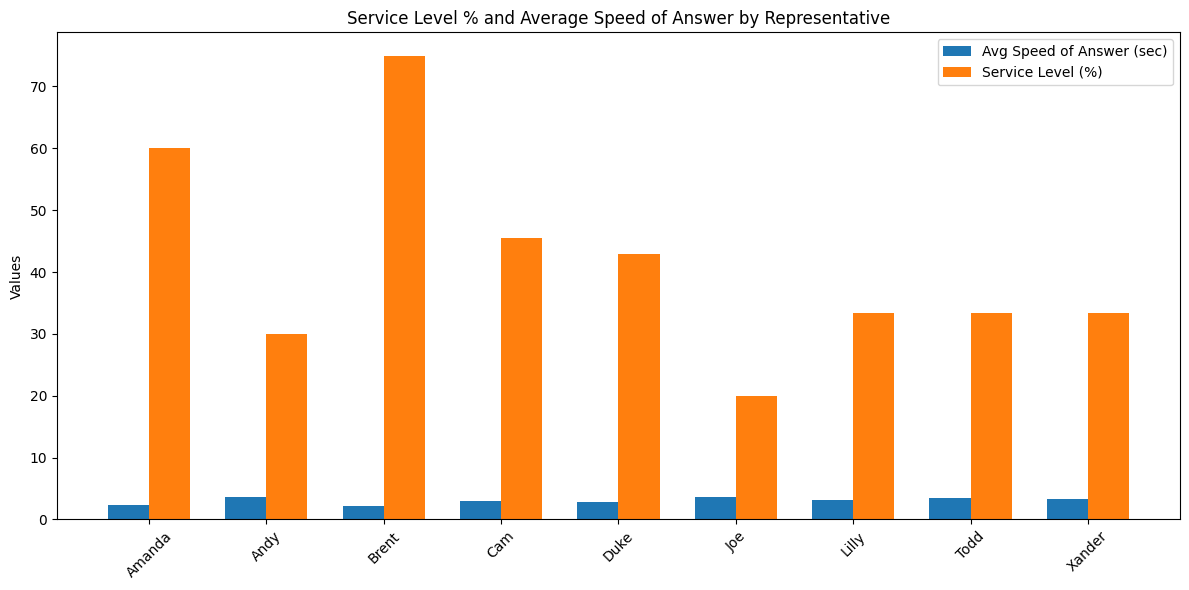

In [25]:
# Making a grouped bar chart to see two versions of the data

reps = north_plt["Rep ID"]    # x-axis labels
asa_values = north_plt["Incoming Wait Time"].values      # These are the values for the average speed of answer
sl_values = service_level["Service Level %"].values      # These are the values for  the service level %

# Create bar positions
x = np.arange(len(reps))
width = 0.35


plt.figure(figsize = (12, 6))

plt.bar(x - width/2, asa_values, width, label = "Avg Speed of Answer (sec)")
plt.bar(x + width/2, sl_values, width, label = "Service Level (%)")

plt.xticks(x, reps, rotation = 45)
plt.title("Service Level % and Average Speed of Answer by Representative")
plt.ylabel("Values")
plt.legend()

plt.tight_layout()
plt.show()


##### Record your answer below:

> Chart style you chose and why: I decided to use a dual axis bar chart since we needed to show two different values for each representative. The bars represent the average answer speed of each representative, and the red line represents each representative's service level percentage. Having the line chart overlap the bar chart allows us to compare the values. The dual axis allows each value to have their own ticks or increments that measure the values more accurately since the average speed of answer is measured in seconds while the service level is a percentage. A grouped bar chart does not allow this clear distinction. Both values are being measured using the same increments on the y-axis, so the average speed of answer looks almost exactly the same for each representative. 

#### Visualization 3: For each type of call purpose, how many calls are outgoing vs. incoming?

In [ ]:
# Create visualization 3 here:
# The three dictionaries, complaints, sales_support, and product_support, have the information you need

purpose_group = df.groupby("Call Purpose")
call_purpose = ["Complaint", "Product Support", "Sales Support"]
purpose_counts = purpose_group["Incoming or Outgoing"].value_counts()
print(purpose_counts)

complaints = purpose_counts["Complaint"].to_dict()
sales_support = purpose_counts["Sales Support"].to_dict()
product_support = purpose_counts["Product Support"].to_dict()

#Your Code Here:


Call Purpose     Incoming or Outgoing
Complaint        Incoming                 51
Product Support  Outgoing                228
                 Incoming                 82
Sales Support    Outgoing                123
                 Incoming                 75
Name: count, dtype: int64


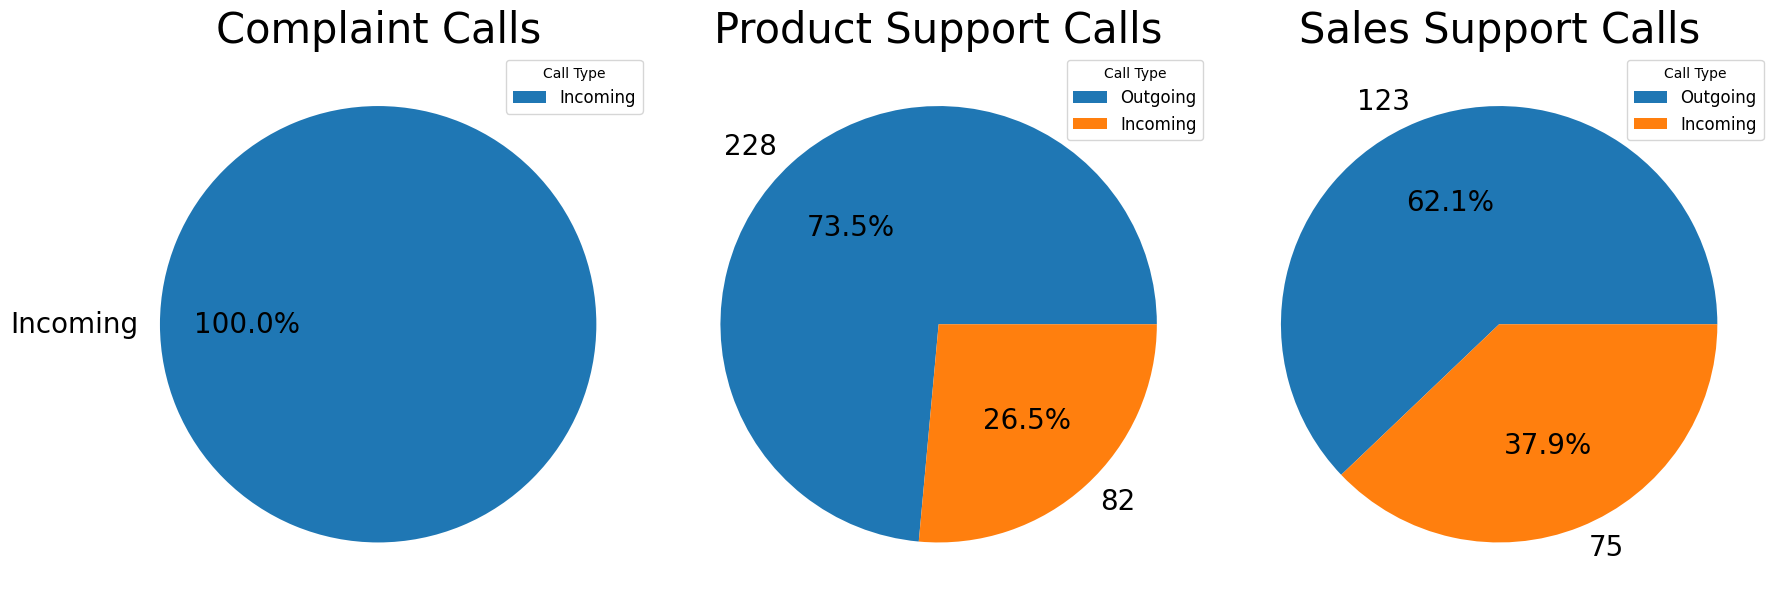

In [43]:
# My code 
# I am creating three pie charts

# I have to turn the dictionaries into a list
complaints_data = list(complaints.values())
complaints_labels = list(complaints.keys())

product_support_data = list(product_support.values())
product_support_labels = list(product_support.keys())

sales_support_data = list(sales_support.values())
sales_support_labels = list(sales_support.keys())

fig, axes=plt.subplots(1,3, figsize = (18, 6))

axes[0].pie(complaints_data, labels = complaints_labels, autopct = '%1.1f%%', textprops = {'fontsize': 20})
axes[0].set_title("Complaint Calls", fontsize = 30)
axes[0].legend(list(complaints.keys()), title = "Call Type", fontsize = 12, loc = "upper right")


axes[1].pie(product_support_data, labels = product_support_data, autopct = '%1.1f%%', textprops = {'fontsize': 20})
axes[1].set_title("Product Support Calls", fontsize = 30)
axes[1].legend(list(product_support.keys()), title = "Call Type", fontsize = 12, loc = "upper right")

axes[2].pie(sales_support_data, labels = sales_support_data, autopct = '%1.1f%%', textprops = {'fontsize': 20})
axes[2].set_title("Sales Support Calls", fontsize = 30)
axes[2].legend(list(sales_support.keys()), title = "Call Type", fontsize = 12, loc = "upper right")


plt.tight_layout()
plt.show()

##### Record your answer below:

> Chart style you chose and why: I decided to create three pie charts, each one representing a call purpose. Since we wanted to see how many calls within each call purpose category were incoming versus outgoing, a pie chart is a good option because they allow us to show numerical proportions of a whole. We can easily compare the proportion of incoming and outgoing calls for each call purpose by viewing these three pie charts. 

## Task 5: Summarize Your Work

With what you know now about the two call centers and the entire company, answer the following questions. Note that while this is subjective, you should include relevant data to back up your opinion.


#### Summary Question 1:  Using KPIs such as average abandonment rate, service level and average speed of answer, in your opinion, which one of the two branches is operating more efficiently? Why?

##### Record your answer below:
> Your Answer: The South Branch appears to be operating more efficiently. The abandonment rates of the North and South branches are 2.86% and 1.27%, respectively, while the company-wide abandonment rate is 1.97%. The South Branch has an abandonment rate well below both the North Branch and the company average. Having a lower abandonment rate is a strong indicator of efficiency because it means that customers are not waiting too long for a representative or giving up on getting connected to one. The South Branch also performed better than the North Branch when it came to the average speed of answer. The North Branch came in at 3.05 seconds with the South Branch at 3.00 seconds. While the North Branch has a slightly higher service level of 40.24% (33 calls) compared to the South Branch with a level of 38.10% (48 calls), the North Branch also handled fewer total calls, so the difference is not as meaningful. The South Branch is operating more efficiently overall because it performs better on the two important metrics of abandonment rate and average speed of answer while handling a higher call volume. 



#### Summary Question 2: Based on the number of reps in each branch and how quickly the reps are working, in your opinion, which branch would benefit from the extra help?

##### Record your answer below:
> Your Answer: The North Branch would benefit from extra help. The North Branch has 9 representatives while the South Branch has 11. The North Branch has a higher speed of answer at 3.05 seconds compared to the South Branch at 3.00 seconds, which means that it takes the representatives at the North Branch slightly longer to answer calls. The North Branch handled fewer calls than the South Branch, which could be due to having fewer representatives. The higher abandonment rate and slower response time of the North Branch show that they may be understaffed and having difficulty managing the current call volume, so adding extra staff to the North Branch would likely improve performance. 


#### Summary Question 3: Now that you have explored the datasets, is there any data or information that you wish you had in this analysis?

##### Record your answer below:
> Your Answer: While the EDA section asked us to calculate the combined number of calls taken for both branches per time block, it would have been good to see how these numbers are split by branch. It could have allowed us to see if call spikes were handled unevenly between the branches. If one branch is being bombarded with calls disproportionately during a certain time block, it would mean that branch needs more staff. We can’t tell if the higher abandonment rate at the North branch is caused by higher call volumes at specific times or not. Also, while the data visualization section asked us to determine the number of outgoing and incoming calls for each call purpose, it would have been good to know how many calls of each call purpose occurred at each branch. We then could have determined the average call duration of each call purpose. Certain types of calls probably last longer than others, such as complaint calls, which may require the representative to place a caller on hold while searching for a resolution or to escalate the call to leadership.


## Bonus Mission
Create a visualization that answers this question: For each call purpose, how many calls (incoming and outgoing) take place in each time block?
##### Record your answer below:

> Chart style you chose and why: 

In [4]:
# Create your Bonus Mission visualization here!
call_times = df[["Time Block", "Call Purpose", "Incoming or Outgoing", "Calls"]]

# Use groupby to plot based on time blocks:

# Use groupby and get_group to select which call purpose to plot:

NameError: name 'df' is not defined